<a href="https://colab.research.google.com/github/richy1996/Springboard_272_Ultimate/blob/main/Ultimate_P3_predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
# load data
data = pd.read_json('ultimate_data_challenge.json')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


- Ok so first thing, we don't have our target of `retained` in our data.
- Let's see if we can create that

In [5]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

data['last_trip_date'].describe()

<ipython-input-5-d637c30c191a>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

- Ok so the date it seems the data was pulled the 2nd time was 2014-07-01

- Now we can create the target by seeing if a given user rode 30 days before that date

In [15]:
cutoff_date = pd.to_datetime('2014-07-01') - pd.Timedelta(days=30)

# if last trip date is greater than or equal to cutoff_date then we can say retained is true

data['retained'] = data['last_trip_date'] >= cutoff_date
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,False
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False


- Now let's do more EDA

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  retained                50000 non-null  bool  

- So we have a few missing values in our data
- `avg_rating_of_driver`, `phone`, `avg_rating_by_driver`

In [17]:
# analyze target

data.retained.value_counts()

False    31196
True     18804
Name: retained, dtype: int64

## Q1

- so 18,804 of 50,000 (37.6%) users were retained

In [19]:
# analyze categorical features

data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


trips_in_first_30_days


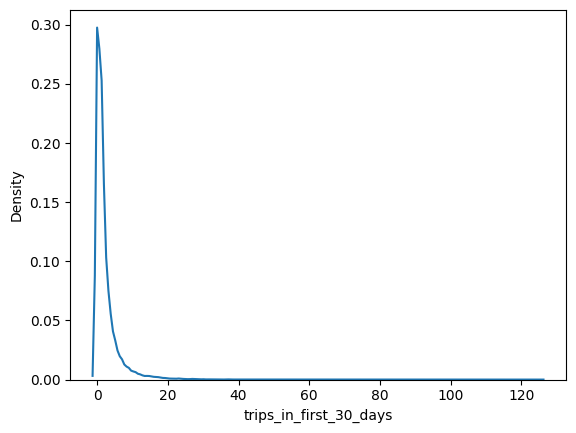


avg_rating_of_driver


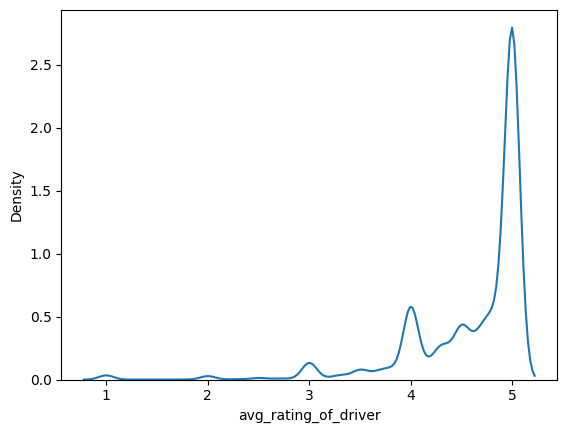


avg_surge


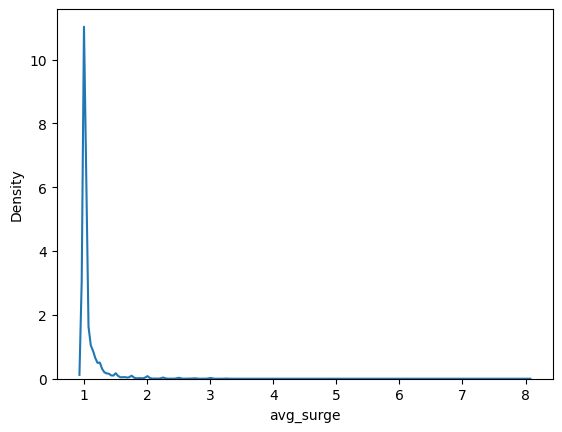


surge_pct


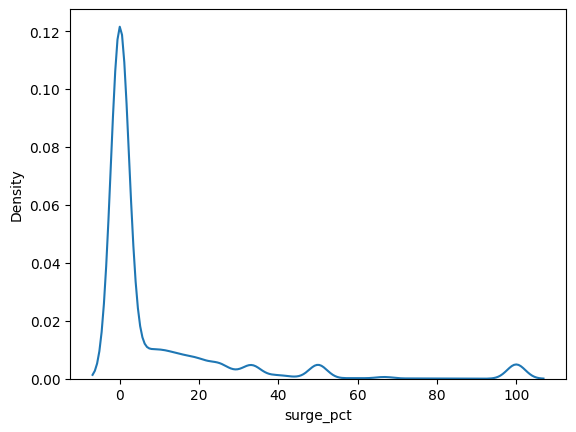


weekday_pct


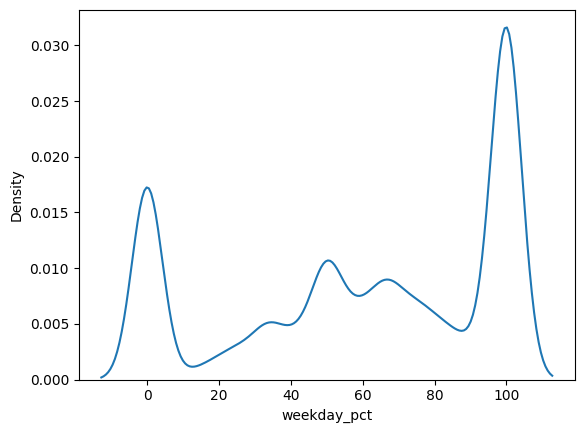


avg_dist


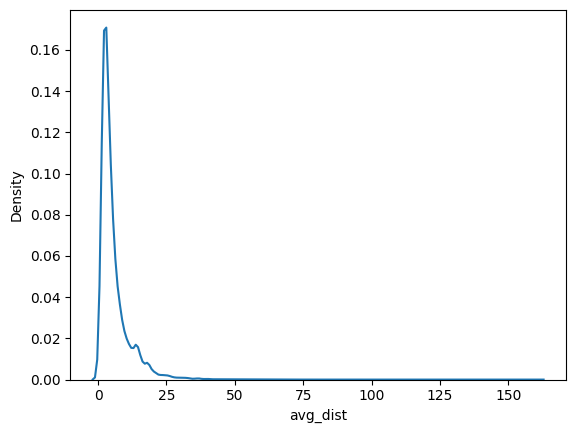


avg_rating_by_driver


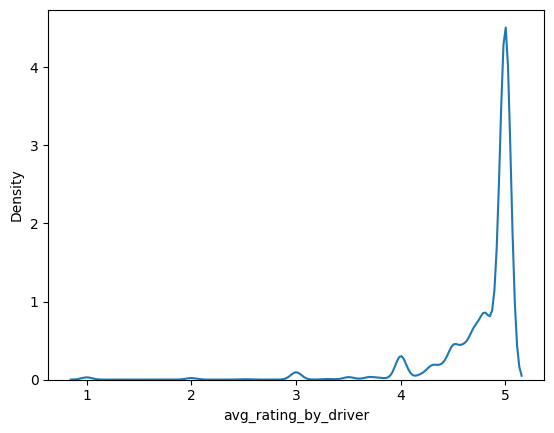

In [52]:
to_plot = ['trips_in_first_30_days',	'avg_rating_of_driver',	'avg_surge',	'surge_pct',	'weekday_pct',	'avg_dist',	'avg_rating_by_driver']

# kde plot for each in to_plot

for feat in to_plot:
    print(feat)
    sns.kdeplot(data[feat])
    plt.show()
    print()

- So many of the features have a skewed distribution with weekday_pct having a bi modal distribution

In [35]:
# Cast retained an ultimate_black_user as int

data['retained'] = data['retained'].astype(int)
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)

city
Axes(0.125,0.11;0.775x0.77)


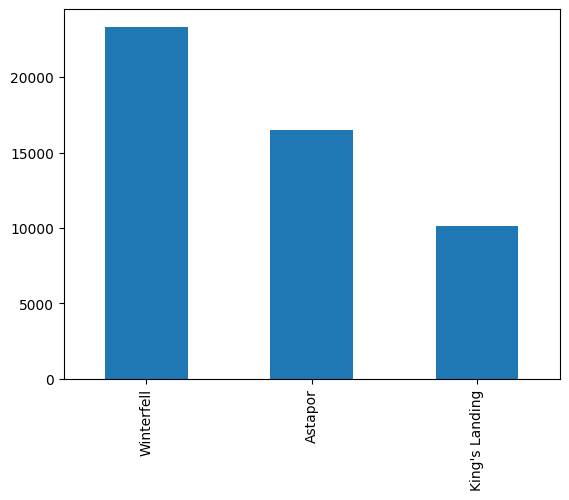


phone
Axes(0.125,0.11;0.775x0.77)


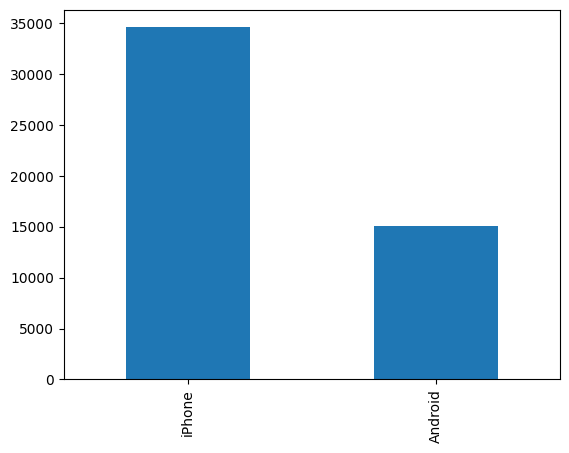


ultimate_black_user
Axes(0.125,0.11;0.775x0.77)


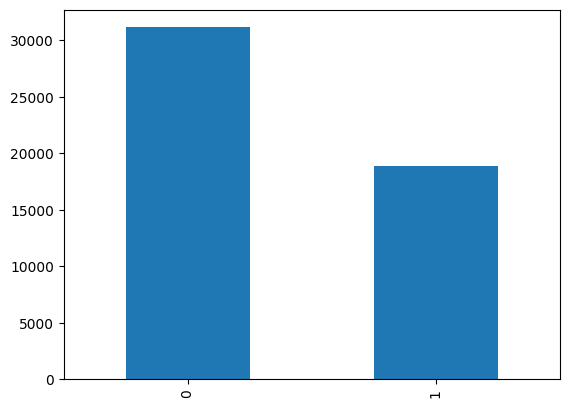

In [42]:
# value counts on categorical/boolean features

cats = ['city', 'phone', 'ultimate_black_user']
for cat in cats:
    print(cat)
    print(data[cat].value_counts().plot(kind='bar'))
    plt.show();
    print()

- Most common city is Winterfell, then Astapor then King's Landing
- More than the double the number of users were iphone users
- And about 10k less ultimate black users than non-ultimate black

city
Axes(0.125,0.11;0.775x0.77)


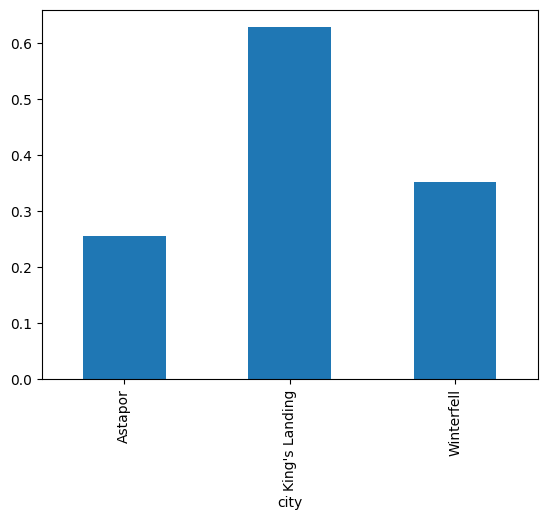


phone
Axes(0.125,0.11;0.775x0.77)


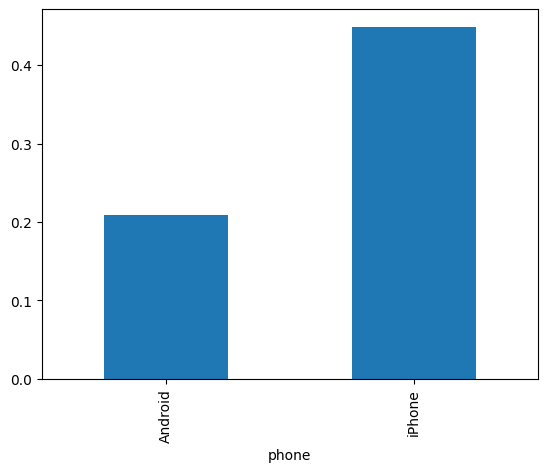


ultimate_black_user
Axes(0.125,0.11;0.775x0.77)


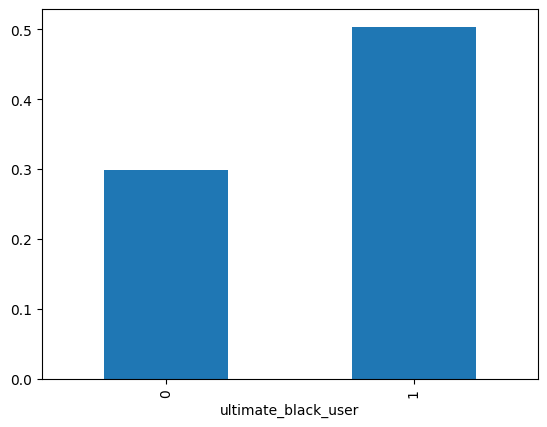

In [54]:
# for each categorical feature, group by the categorical feature and get the mean of the retained

for cat in cats:
    print(cat)
    print(data.groupby(cat)['retained'].mean().plot(kind='bar'))
    plt.show();
    print()

- King's landing retained 60% of users while Astapor and Winterfell was around 25-35%
- 40 vs 20% of iphone users were retained vs android
- 50% of ultimate black users retained vs 30% non ultimate

In [28]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

data['signup_date'].describe()

<ipython-input-28-ab6c788ed4a4>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['signup_date'].describe()


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

# Q2

- To quickly get insights on what's most predictive we can measure correlation of features to target
- Also can get mutual information

In [63]:
# Extract purely numerical features

num_feats = data.select_dtypes(include='number').columns

num_feats = num_feats.drop('ultimate_black_user')

num_feats

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'retained'],
      dtype='object')

In [66]:
# Estimate correlation of each feature with retained

data[num_feats].corr()['retained'].sort_values()

avg_dist                 -0.092780
avg_rating_by_driver     -0.026791
avg_rating_of_driver     -0.011653
avg_surge                -0.003333
weekday_pct               0.009693
surge_pct                 0.011797
trips_in_first_30_days    0.210463
retained                  1.000000
Name: retained, dtype: float64

- So probably as expected, number of trips in first 30 days is the most correlated
- And avg distance has a decent negative correlation which may be due to the rare rider who takes a long trip but otherwise doesn't use it much which might be in contrast to frequent users who have shorter trips

In [67]:
data['trips_in_first_30_days'].corr(data['avg_dist'])

-0.13632851330485665

In [69]:
# extract all potential features

all_feats = data.columns.drop(['retained', 'last_trip_date', 'signup_date'])
all_feats

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [74]:
# Estimate mutual info from sklearn

from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import LabelEncoder

- Fix data with missing values

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  retained                50000 non-null  int64 

In [87]:
df = data.copy()

# missing
miss = ['avg_rating_of_driver', 'avg_rating_by_driver', 'phone']
df[miss].describe(include='all')

,avg_rating_of_driver,avg_rating_by_driver,phone
count,41878.000000,49799.000000,49604
unique,NaN,NaN,2
top,NaN,NaN,iPhone
freq,NaN,NaN,34582
mean,4.601559,4.778158,NaN
std,0.617338,0.446652,NaN
min,1.000000,1.000000,NaN
25%,4.300000,4.700000,NaN
50%,4.900000,5.000000,NaN
75%,5.000000,5.000000,NaN


- For the two driver features, put 0 for missing values
- For the phone, put 'unknown'

In [88]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(0)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(0)
df['phone'] = df['phone'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  int64 

In [93]:
x1=df[cats].apply(LabelEncoder().fit_transform)
# Then run the exact same code you were running.

x2 = df[num_feats].join(x1)
y = x2['retained']

res = mutual_info_classif(x2, y)

pd.Series(res, index=x2.columns).sort_values(ascending=False)

retained                  0.666772
weekday_pct               0.115458
avg_rating_by_driver      0.082185
surge_pct                 0.081644
avg_surge                 0.069904
avg_rating_of_driver      0.058890
city                      0.040084
trips_in_first_30_days    0.038716
phone                     0.031591
ultimate_black_user       0.023151
avg_dist                  0.019901
dtype: float64

- I've noticed this in another project, mutual info can be useful as it can handle non linear relations but it does seem to be non intuitive in its results sometimes

- Even retained has only a value of 0.66 out of 1 with itself

## Hist Gradient Boost Model

- Choosing Hist Gradient Boosting model as it's inspired by lightgbm, very fast, doesn't usually require scaling and can handle categorical features natively
- And it's very fast

In [ ]:
df[cats] = df[cats].astype('category')

In [113]:
# define target

target = 'retained'

In [138]:
# Ordinal encode the cats

for col in cats:
    df[col] = df[col].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split

X = df[all_feats].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(categorical_features=cats)
model.fit(X_train, y_train)

model

HistGradientBoostingClassifier(categorical_features=['city', 'phone',
                                                     'ultimate_black_user'])

- Analyze results

In [156]:
# import log loss from sklearn

from sklearn.metrics import log_loss

In [157]:
log_loss(y_train, model.predict(X_train))

6.874039610638771

In [158]:
log_loss(y_test, model.predict(X_test))

7.655671979848484

- So maybe it's slightly over fit but not terribly
- Analyze a few more metrics to get a better idea of the effectiveness

In [161]:
# import accuracy score and auc from sklearn

from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(y_train, model.predict(X_train)), accuracy_score(y_test, model.predict(X_test))

(0.8092857142857143, 0.7876)

- Remember we have class imbalance

In [163]:
df.retained.value_counts() / len(df)

0    0.62392
1    0.37608
Name: retained, dtype: float64

- But it does seem to be better than naively predicting 0

In [164]:
roc_auc_score(y_train, model.predict(X_train)), roc_auc_score(y_test, model.predict(X_test))

(0.7880197307559728, 0.7652135527672101)

- Rule of thumb is anything above 0.5 is good

- So we can say this model is effective

- Let's analyze feature importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=0, n_jobs=-1)

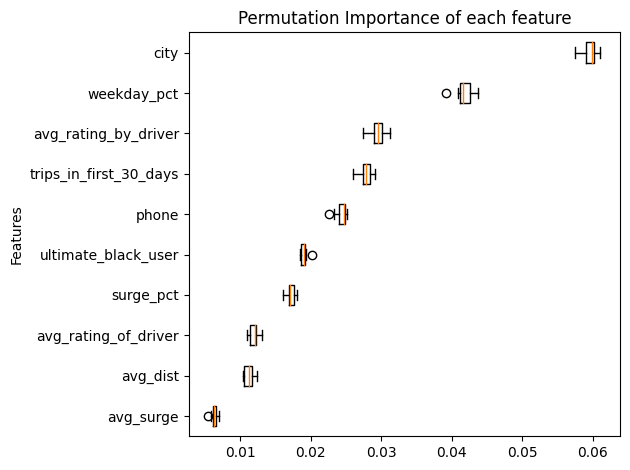

In [172]:
# Sort the indices of the importances
sorted_idx = result.importances_mean.argsort()

# Use the column names of the DataFrame for labels, aligned with the sorted indices
labels = X.columns[sorted_idx]

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=labels)

# Set the title and y-axis label
ax.set_title("Permutation Importance of each feature")
ax.set_ylabel("Features")

# Adjust layout for better fit
fig.tight_layout()

# Display the plot
plt.show()


- More on these feature importances below

## Comments

- I considered logistic regression at first as it's a simple and effective model and is good to start out with but Hist Gradient Boosting handles the aspects of our data more easily, it's fast and effective as well
- Concerns are slight overfitting

## 3

- Based on our knowledge of the relationships with the features and target, Ultimate could use the info in the following ways

- City is the most important feature according to the model, not much you can do there though

- Weekday pct is next most important, so maybe sending advertisements pushing for using the app during the week is a good idea
- Again you can't have influence on the rating by driver (not ethically anyways).
- Also highly encouraging users to use the app early on, in the first 30 days would be helpful
- As well as recommending an ultimate black ride